# Class 30: Learning Curves, Validation Curves

1. Join prismia
1. say hello in the zoom chat

In [1]:
# %load http://drsmb.co/310
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import cluster
from sklearn import svm
from sklearn import tree
from sklearn import model_selection

In [2]:
iris_X , iris_y = datasets.load_iris(return_X_y= True)
iris_X_train, iris_X_test, iris_y_train, iris_y_test = model_selection.train_test_split(
            iris_X , iris_y,test_size =.2)

In [3]:
param_grid = {'kernel':['linear','rbf'], 'C':[.5, 1, 10]}
svm_clf = svm.SVC(kernel='linear')
svm_opt =model_selection.GridSearchCV(svm_clf,param_grid,)
svm_opt.fit(iris_X_train, iris_y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.5, 1, 10], 'kernel': ['linear', 'rbf']})

<ErrorbarContainer object of 3 artists>

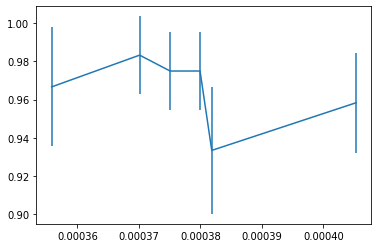

In [4]:
df_svm = pd.DataFrame(svm_opt.cv_results_)
df_svm.sort_values(by='mean_score_time',inplace=True)
plt.errorbar(df_svm['mean_score_time'],df_svm['mean_test_score'], df_svm['std_test_score'])

In [5]:
model_selection.learning_curve(svm_opt.best_estimator_,iris_X_train, iris_y_train,
                              train_sizes= [.4,.5,.6,.8])

(array([38, 48, 57, 76]),
 array([[0.97368421, 0.97368421, 1.        , 1.        , 1.        ],
        [0.97916667, 1.        , 0.97916667, 0.97916667, 0.97916667],
        [0.96491228, 1.        , 0.98245614, 0.98245614, 0.98245614],
        [0.96052632, 0.98684211, 0.97368421, 0.97368421, 0.97368421]]),
 array([[0.95833333, 0.95833333, 0.875     , 0.95833333, 1.        ],
        [1.        , 0.95833333, 0.95833333, 0.95833333, 1.        ],
        [1.        , 0.95833333, 0.95833333, 0.95833333, 1.        ],
        [1.        , 0.95833333, 0.95833333, 0.95833333, 1.        ]]))

In [6]:
# %load http://drsmb.co/310
def lc_plot(train_sizes, train_scores, valid_scores):
    ts_len = len(train_sizes)
    ts = np.reshape(train_sizes,(ts_len,1))

    cols = ['size']
    cols.extend(['split_' + str(i) for i in range(5)])

    df = pd.DataFrame(np.block([[ts,train_scores],[ts,valid_scores]]),columns = cols)
    df['type'] = ['train']*ts_len + ['validation']*ts_len

    df_m = df.melt(id_vars=['size','type'],value_name='score',var_name='split')
    g = sns.lmplot(data=df_m,x='size', y='score',hue='type',)
    return g

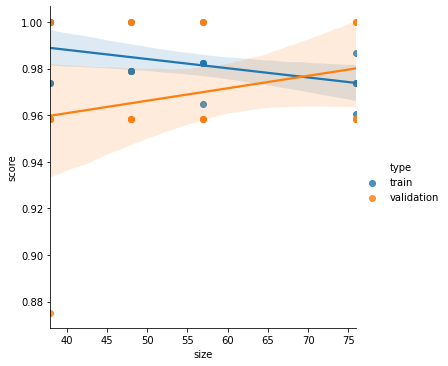

In [7]:
train_sizes, train_scores, valid_scores = model_selection.learning_curve(svm_opt.best_estimator_,iris_X_train, iris_y_train,
                              train_sizes= [.4,.5,.6,.8])
lc_plot(train_sizes, train_scores, valid_scores)

In [8]:
train_scores, valid_scores = model_selection.validation_curve(tree.DecisionTreeClassifier(),iris_X_train, iris_y_train,
                        param_name='max_depth', param_range=list(range(1,6)))

In [9]:
param_values = list(range(1,6))

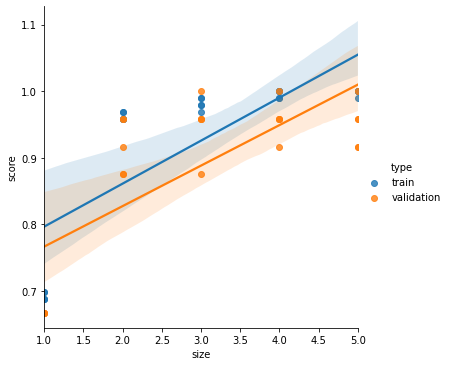

In [10]:
lc_plot(param_values, train_scores, valid_scores)

In [11]:
digits_X, digits_y = datasets.load_digits(return_X_y = True)

In [12]:
digits_X.shape

(1797, 64)

Fit an SVM, with rbf kernel, examine the learning curve and the validation curve for paramters gamma

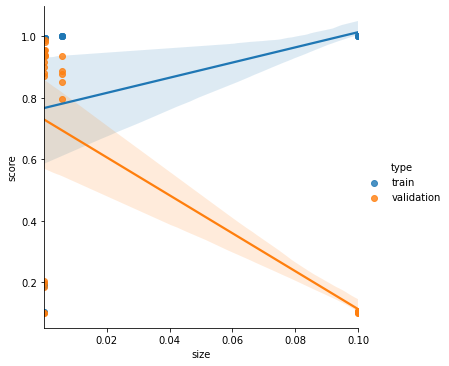

In [13]:
param_range = np.logspace(-6, -1, 5)
train_scores, valid_scores = model_selection.validation_curve(svm.SVC(),
                                                              digits_X, digits_y,
                        param_name='gamma', param_range=param_range)
lc_plot(param_range, train_scores, valid_scores)

In [14]:
train_sizes, train_scores, valid_scores = model_selection.learning_curve(svm.SVC(),
                                                              digits_X, digits_y)